# World Happiness & Economic and social indicators correlations

## Model: RandomForest

In [67]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import warnings

# Version Check
print(f"pandas: {pd.__version__}, numpy: {np.__version__}, sklearn: {sklearn.__version__}, seaborn: {sns.__version__}")

# Warnings Off
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Datasets
def load_dataset(path):
    """Load CSV dataset with standard parameters."""
    return pd.read_csv(path, encoding='utf-8-sig', skip_blank_lines=True)

merged = load_dataset('../data/processed/gpt_train_dataset.csv')
test = load_dataset('../data/processed/gpt_test_dataset(2023).csv')

pandas: 2.2.3, numpy: 2.2.2, sklearn: 1.6.1, seaborn: 0.13.2


🧮 Validation MAE: 0.3357
📊 Validation RMSE: 0.4680
📈 Validation R²: 0.8311


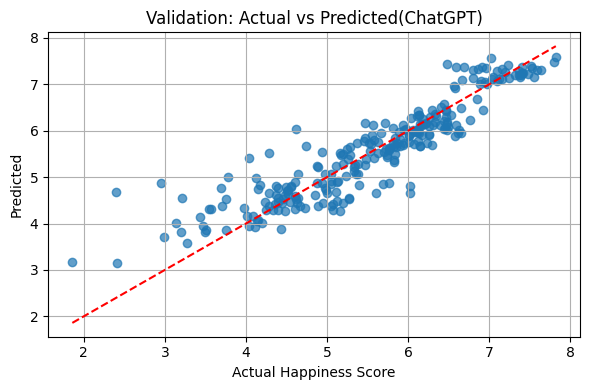

In [68]:
# Define Features and Target
features = ['GDP_per_capita', 'Education_Attainment', 'Life_Expectancy', 'Unemployment_Rate']
target = 'Happiness Score'

# Split Data by Year
train = merged[merged['Year'] <= 2020]
val   = merged[(merged['Year'] > 2020) & (merged['Year'] <= 2022)]

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

# Train a Basic Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Validation Performance
val_preds = model.predict(X_val)
val_mae = mean_absolute_error(y_val, val_preds)
val_rmse = sqrt(mean_squared_error(y_val, val_preds))
val_r2 = r2_score(y_val, val_preds)

print(f"🧮 Validation MAE: {val_mae:.4f}")
print(f"📊 Validation RMSE: {val_rmse:.4f}")
print(f"📈 Validation R²: {val_r2:.4f}")

# Plot predictions vs actual
plt.figure(figsize=(6, 4))
plt.scatter(y_val, val_preds, alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted")
plt.title("Validation: Actual vs Predicted(ChatGPT)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 2023 Test Evaluation

🧪 Test MAE (2023): 0.5025
🧪 Test RMSE (2023): 0.7458
🧪 Test R² (2023): 0.6092


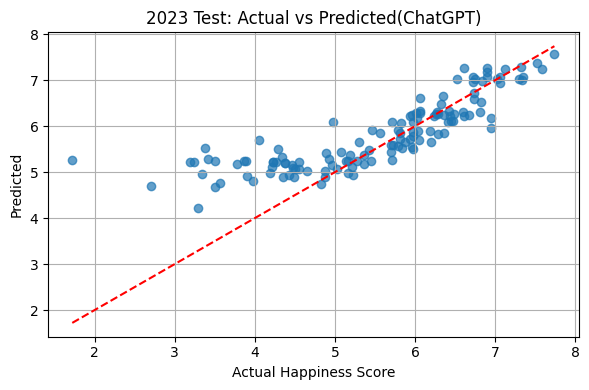

In [69]:
test_preds = model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_preds)
test_rmse = sqrt(mean_squared_error(y_test, test_preds))
test_r2 = r2_score(y_test, test_preds)

print(f"🧪 Test MAE (2023): {test_mae:.4f}")
print(f"🧪 Test RMSE (2023): {test_rmse:.4f}")
print(f"🧪 Test R² (2023): {test_r2:.4f}")

# Plot: Actual vs Predicted for 2023
plt.figure(figsize=(6, 4))
plt.scatter(y_test, test_preds, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted")
plt.title("2023 Test: Actual vs Predicted(ChatGPT)")
plt.grid(True)
plt.tight_layout()
plt.show()

## 📊 Model Performance Report (2023 Test Set)

### Model: `RandomForestRegressor` (default parameters)

---

### Overall Performance

| Metric | Value | Interpretation |
|--------|--------|----------------|
| **MAE** (Mean Absolute Error) | `0.5025` | On average, predictions differ by ~0.50 from the actual Happiness Score. |
| **RMSE** (Root Mean Squared Error) | `0.7458` | Indicates reasonably stable predictions, though some moderate deviations exist. |
| **R² Score** (Coefficient of Determination) | `0.6092` | Approximately 60.9% of the variance in Happiness Score is explained by the model. |

---

### Prediction Analysis

- Predicted scores generally align with actual scores (see scatter plot).
- Strong linear relationship observed, especially between scores 5 and 7.
- Slight underestimation occurs in the higher happiness range (6.5–7.5).
- Increased spread and uncertainty in the lower score range (<5), indicating variability in underperforming countries.

---

### Observations & Recommendations

- The model performs reasonably well, but further optimisation is needed to capture low-end variance.
- Suggestions:
  - Explore **feature importance** to eliminate low-impact predictors.

In [73]:
merged = load_dataset('../data/processed/train_dataset.csv')
test = load_dataset('../data/processed/test_dataset(2023).csv')

🧮 Validation MAE: 0.3418
📊 Validation RMSE: 0.4703
📈 Validation R²: 0.8286


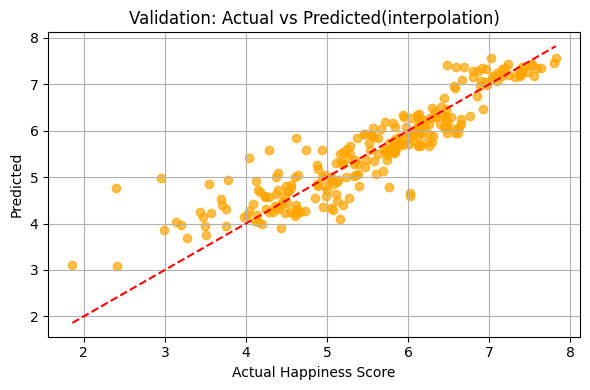

In [77]:
# Define Features and Target
features = ['GDP_per_capita', 'Education_Attainment', 'Life_Expectancy', 'Unemployment_Rate']
target = 'Happiness Score'

# Split Data by Year
train = merged[merged['Year'] <= 2020]
val   = merged[(merged['Year'] > 2020) & (merged['Year'] <= 2022)]

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

# Train a Basic Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Validation Performance
val_preds = model.predict(X_val)
val_mae = mean_absolute_error(y_val, val_preds)
val_rmse = sqrt(mean_squared_error(y_val, val_preds))
val_r2 = r2_score(y_val, val_preds)

print(f"🧮 Validation MAE: {val_mae:.4f}")
print(f"📊 Validation RMSE: {val_rmse:.4f}")
print(f"📈 Validation R²: {val_r2:.4f}")

# Plot predictions vs actual
plt.figure(figsize=(6, 4))
plt.scatter(y_val, val_preds, alpha=0.7, color='orange')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted")
plt.title("Validation: Actual vs Predicted(interpolation)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 2023 Test Evaluation

🧪 Test MAE (2023): 0.4072
🧪 Test RMSE (2023): 0.5424
🧪 Test R² (2023): 0.7910


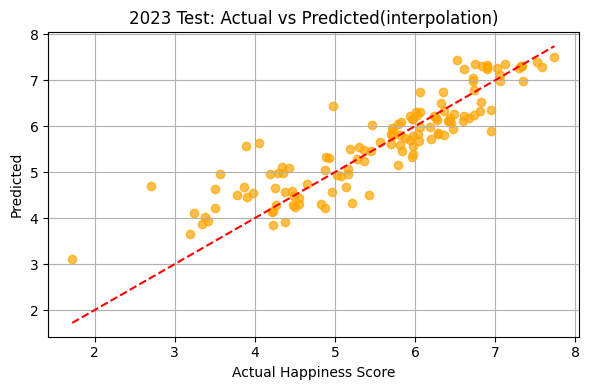

In [78]:
test_preds = model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_preds)
test_rmse = sqrt(mean_squared_error(y_test, test_preds))
test_r2 = r2_score(y_test, test_preds)

print(f"🧪 Test MAE (2023): {test_mae:.4f}")
print(f"🧪 Test RMSE (2023): {test_rmse:.4f}")
print(f"🧪 Test R² (2023): {test_r2:.4f}")

# Plot: Actual vs Predicted for 2023
plt.figure(figsize=(6, 4))
plt.scatter(y_test, test_preds, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted")
plt.title("2023 Test: Actual vs Predicted(interpolation)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Performance Report (2023 Test Set)

### Model: `RandomForestRegressor` (default parameters)

---
### Overall Performance

| Metric | Value | Interpretation |
|--------|--------|----------------|
| **MAE** (Mean Absolute Error) | `0.4072` | On average, predictions differ by ~0.41 from the actual score. |
| **RMSE** (Root Mean Squared Error) | `0.5424` | Indicates stable prediction performance with minimal large errors. |
| **R² Score** (Coefficient of Determination) | `0.7910` | Approximately 79.45% of the variance in Happiness Score is explained by the model. |

---

### Prediction Analysis

- Predictions closely follow the actual values.
- Slight underestimation is visible in the upper happiness score range.
- More variability is observed in lower-scoring countries, still suggesting areas for improvement.

---

### Observations & Recommendations

- The model is robust for general prediction but may benefit from further fine-tuning.
- Advanced models (e.g., XGBoost, LightGBM) and feature engineering could improve accuracy.
- Consider adding categorical features (e.g., region, income group) and macroeconomic indicators.
- future versions should prioritise richer, more up-to-date datasets.

### Feature Importance Analysis


Feature Importance (Descending Order):
GDP_per_capita          0.676189
Life_Expectancy         0.190745
Unemployment_Rate       0.067747
Education_Attainment    0.065318
dtype: float64


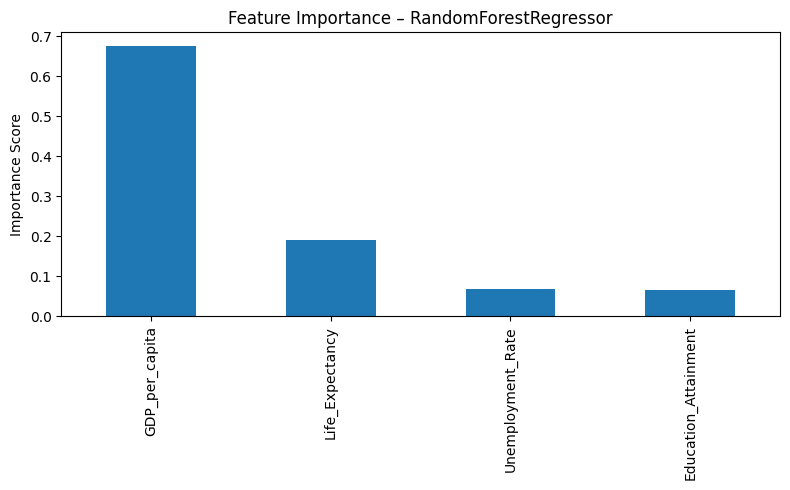

In [79]:
# Extract feature importances
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Display ranked features
print("\nFeature Importance (Descending Order):")
print(importances)

# Optional: Visualise feature importances
plt.figure(figsize=(8, 5))
importances.plot(kind='bar')
plt.title("Feature Importance – RandomForestRegressor")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()